In [2]:
import fastf1 as ff1
from fastf1 import plotting

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [4]:
plotting.setup_mpl()
ff1.Cache.enable_cache('cache')

In [8]:
race = ff1.get_session(2024, 'Suzuka', 'R')
race.load()

core           INFO 	Loading data for Japanese Grand Prix - Race [v3.4.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No c

In [10]:
laps = race.laps

In [11]:
laps_ver = laps.pick_driver('VER')
laps_per = laps.pick_driver('PER')

In [12]:
ver_fastest = laps_ver.pick_fastest()
per_fastest = laps_per.pick_fastest()

In [15]:
telemetry_ver = ver_fastest.get_car_data().add_distance()
telemetry_per = per_fastest.get_car_data().add_distance()

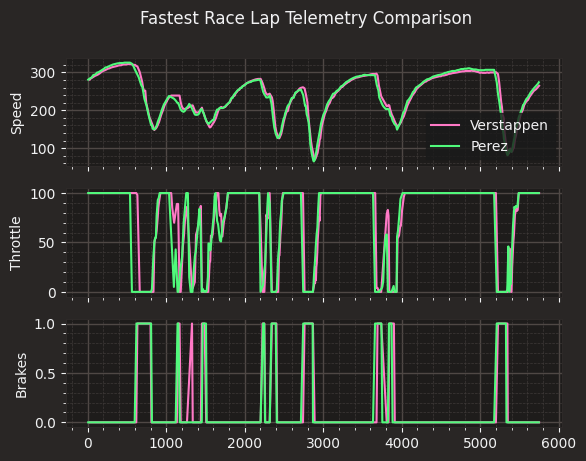

In [19]:
fig, ax = plt.subplots(3)
fig.suptitle("Fastest Race Lap Telemetry Comparison")

ax[0].plot(telemetry_ver['Distance'], telemetry_ver['Speed'], label='Verstappen')
ax[0].plot(telemetry_per['Distance'], telemetry_per['Speed'], label='Perez')
ax[0].set(ylabel = 'Speed')
ax[0].legend(loc="lower right")

ax[1].plot(telemetry_ver['Distance'], telemetry_ver['Throttle'], label='Verstappen')
ax[1].plot(telemetry_per['Distance'], telemetry_per['Throttle'], label='Perez')
ax[1].set(ylabel = 'Throttle')

ax[2].plot(telemetry_ver['Distance'], telemetry_ver['Brake'], label='Verstappen')
ax[2].plot(telemetry_per['Distance'], telemetry_per['Brake'], label='Perez')
ax[2].set(ylabel = 'Brakes')

for a in ax.flat:
    a.label_outer()

plt.show()